# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

pour faire plaisir à William, il est demandé de mettre des titres. Faites attention car il a tendance à devenir grumpy si on ne le fait pas 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

Our library

In [2]:
from proj1_helpers import *
from data_utility import *
from Regressions import *

# Regression

Abandoned GD and SGD for least squares (pointless to lose time having explicit form solution)

### Data loading

In [3]:
y_tr, X_tr, ids_tr = load_csv_data('../Data/train.csv')
y_te, X_te, ids_te = load_csv_data('../Data/test.csv')

preliminary Data treatment

In [4]:
n,p = X_tr.shape
keepers = np.ones(p, dtype=bool)

y_tr[y_tr==-1] = 0
y_te[y_te==-1] = 0

# for i in range(p):
#     percentage = len(np.where(X_tr[:,i] ==-999)[0])/n*100
#     if percentage > 70:
#         keepers[i] = 0
keepers[22] = 0 #Remove jet_num

print("Removed features: \n",np.where(keepers == 0))
x_tr = preliminary_treatment_X(X_tr, keepers)
x_te = preliminary_treatment_X(X_te, keepers)
n,p = x_tr.shape

Removed features: 
 (array([22]),)


In [5]:
print(n,p)

250000 34


### Removal of -999 datas

In [39]:
jet_num = X[:,22]
null_v = np.zeros((len(jet_num),1))
jet_0 = np.copy(null_v)
jet_1 = np.copy(null_v)
jet_2 = np.copy(null_v)
jet_3 = np.copy(null_v)

jet_0[jet_num==0] = 1
jet_1[jet_num==1] = 1
jet_2[jet_num==2] = 1
jet_3[jet_num==3] = 1

In [42]:
keepers = np.ones(X.shape[1], dtype=bool)
keepers[[4,5,6,12,22,26,27,28]] = 0

x = X[:,keepers]

x = np.hstack((x,jet_0,jet_1,jet_2,jet_3))

print(x.shape)

(250000, 26)


## which Definition

In [7]:
which = range(p) #Change according to desired features in tests

### Scatter plots

Scatter plot for 6th feature :


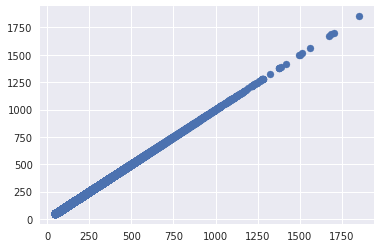

Scatter plot for 17th feature :


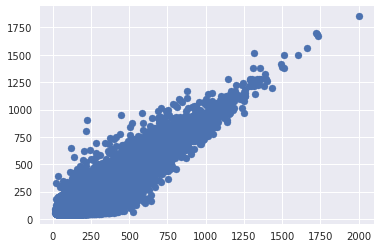

Scatter plot for 22th feature :


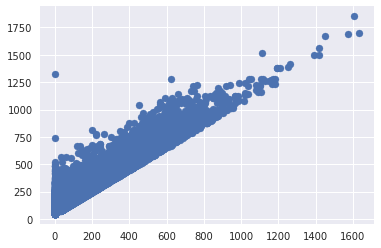

In [7]:
scatter(x,which, other_f= True, against=x[:,6])

### Histograms

In [8]:
x = x_tr

In [9]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/william/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/william/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid

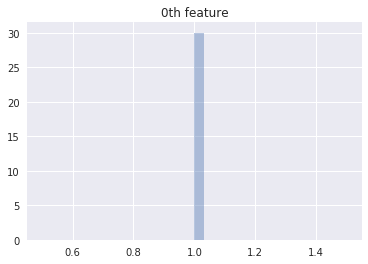

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


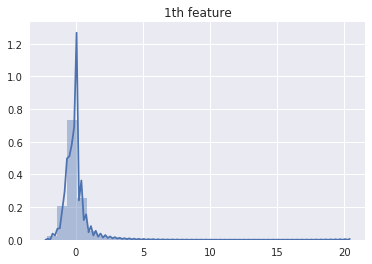

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


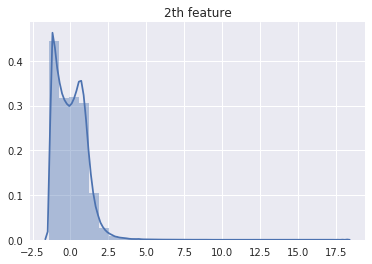

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


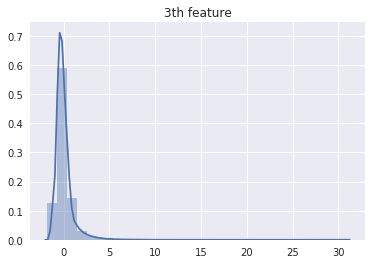

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


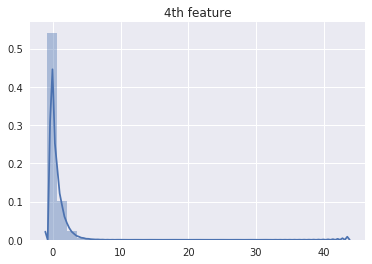

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


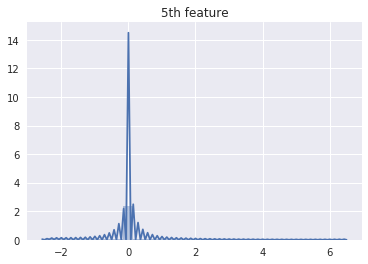

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


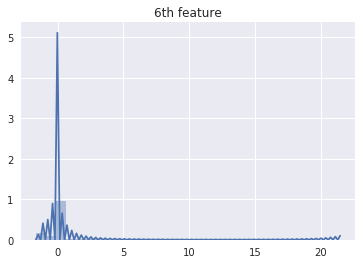

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


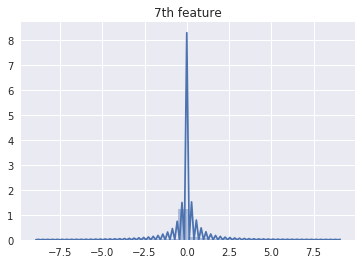

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


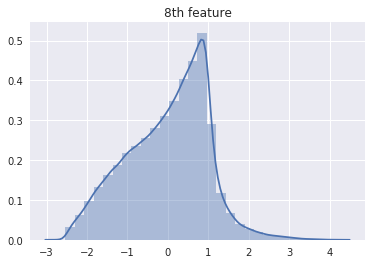

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


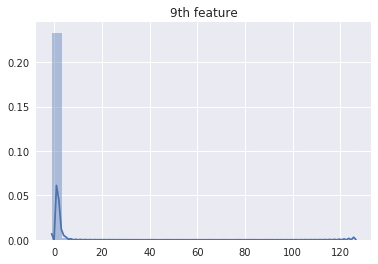

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


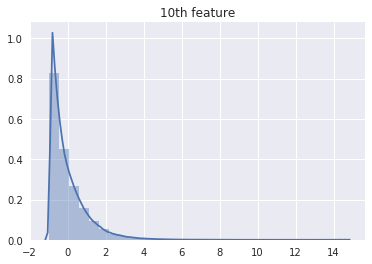

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


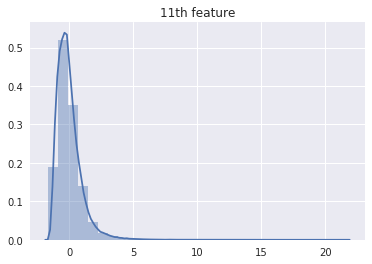

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


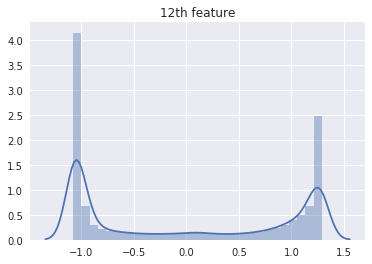

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


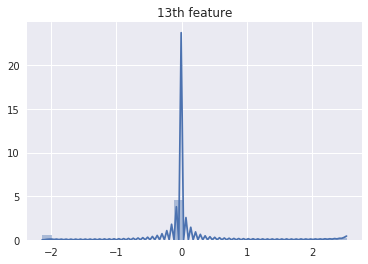

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


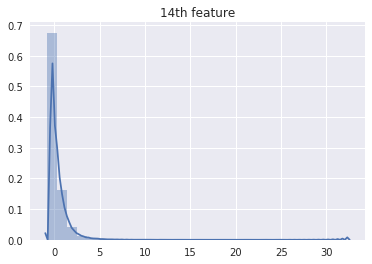

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


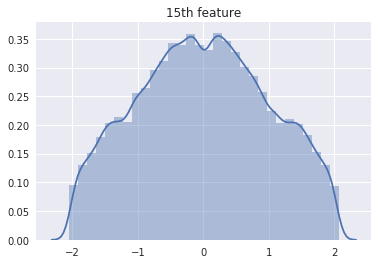

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


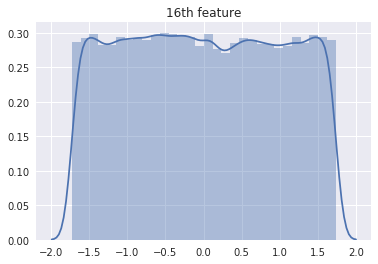

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


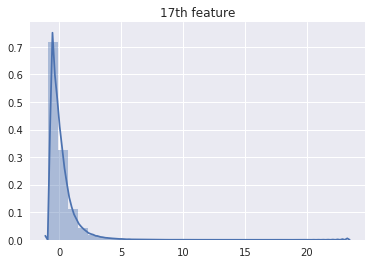

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


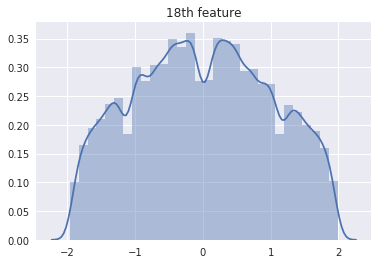

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


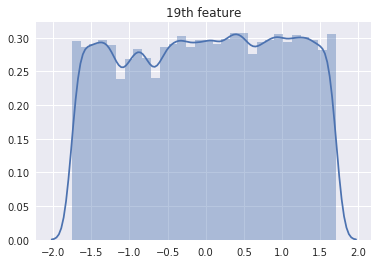

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


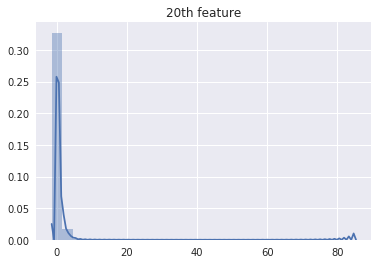

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


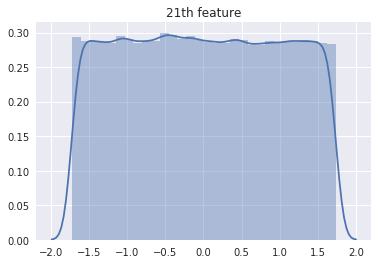

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


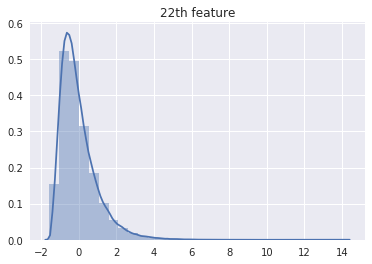

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


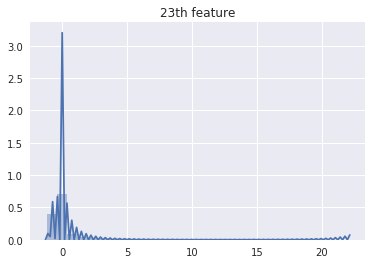

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


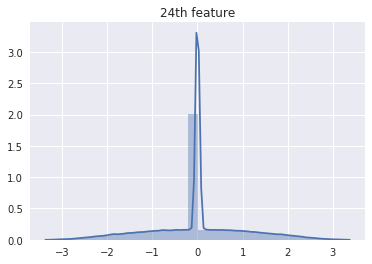

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


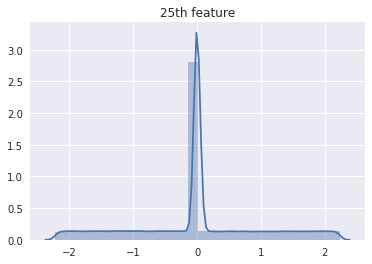

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


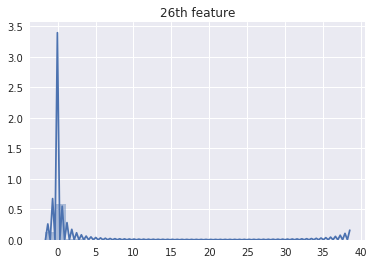

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


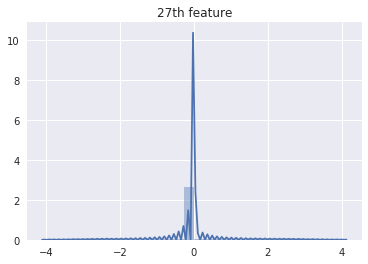

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


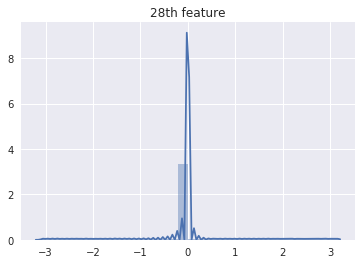

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


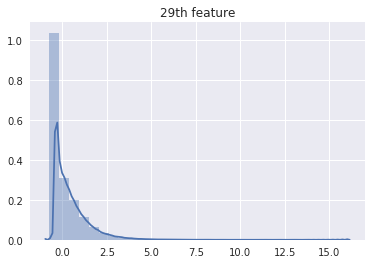

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


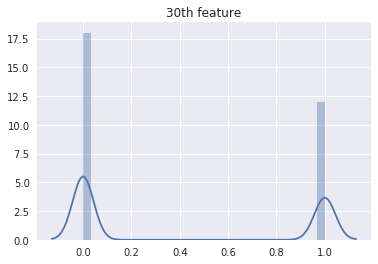

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


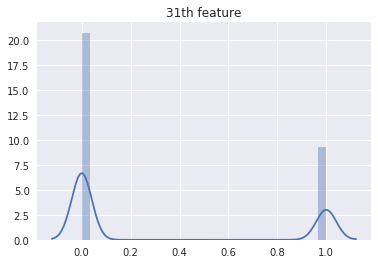

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


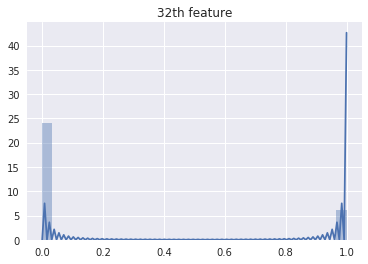

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


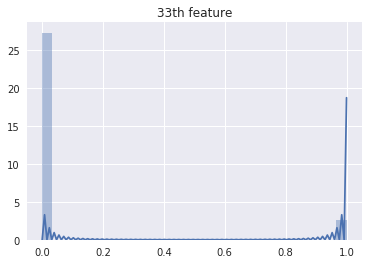

In [10]:
for i in which:
    feature = x[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

/home/william/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/william/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


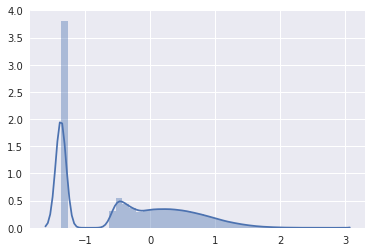

In [31]:
i = 29
feature = np.log(x[:,i]+1)

sns.distplot(feature,bins=40,kde=True)


### Single feature-response plots

In [ ]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

In [ ]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


### Features with "too many" -999

Checked to eventually remove them.

In [ ]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    if percentage > 60:
        print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

## Cross validation

Testing for method ridge_regression... Be patient! ;)
Testing for method logistic_regression... Be patient! ;)
Testing for method ridge_regression... Be patient! ;)
Testing for method logistic_regression... Be patient! ;)
[<function ridge_regression at 0x7f71a3fdca60>, 3.162277660168379e-08] [<function feature_transform at 0x7f71a4045d90>, [<function log_plus at 0x7f71a4045c80>, [4, 9, 14, 17, 29], 1]]


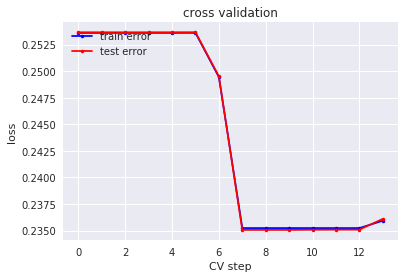

In [35]:
w = np.zeros(tx.shape[1])
# lambdas = [10**(-7)]
lambdas = np.logspace(-7.5,-5.5,6)
# reg_logit_params =[[lambdas[0], w],
#               [lambdas[2], w],
#               [lambdas[4], w]]


k_fold = 10

l_p_1 = [4,9,14,17,29]
# l_p_2 = [20,23]
# l_p_3 = [3]

# multi_transform = [[log_plus, l_p_1, 1],
#                                           [log_plus, l_p_2, 2],
#                                           [log_plus, l_p_3, 3]]

# [feature_transform, [np.log, [10,13]]]
transformations = [[id,[]],
                  [feature_transform, [log_plus, l_p_1, 1]]]

methods = [[ridge_regression, lambdas],
          [logistic_regression, [w]]]
#           [reg_logistic_regression, reg_logit_params]]

predictor, w, loss_tr, loss_te, transformation, method = multi_cross_validation(y_tr, tx, k_fold, transformations=transformations, methods=methods, seed=2)

print(method, transformation)

In [6]:
tx = x_tr

In [58]:
w = np.zeros(tx.shape[1])
logistic_regression(y_tr, tx, w)

ValueError: cannot reshape array of size 1156 into shape (34,1)

In [42]:
print(np.log10(5e-06))

-5.301029995663981


In [63]:
print(loss_te)

0.266164


In [20]:
transformations = [[id,[]]]
for i,j in transformations:
    print(i(2,j))
    

2


In [29]:
def func(a, b, *args,c='hello'):
    print(np.linalg.norm(a*b),c)

In [31]:
a = np.ones(3)
b = 0

func(a,b, ('yolo', [], 3))

0.0 hello
